Laboratorio Aprendizaje automático - Árboles de decision y Random forests

- Demostración de análisis de datos en Python
- Explicación de la actividad

The most difficult thing in life is to know yourself - Tales de Mileto

Hair, J. F., Black, W. C., Babin, B. J., Anderson, R. E., & Tatham, R. L. (1998). Multivariate data analysis (Vol. 5, No. 3, pp. 207-219). Upper Saddle River, NJ: Prentice hall. (Chapter 2)

Datos de ejemplo: https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset


In [2]:
import numpy as np
import pandas as pd

In [3]:
hourData = pd.read_csv('hour2.csv')
hourData.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01/01/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16.01
1,2,01/01/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40.00
2,3,01/01/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32.00
3,4,01/01/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13.00
4,5,01/01/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1.00


In [5]:
# conocer el número de filas y columnas para saber si se ha cargado completo el fichero,
# especialmente delicado en ficheros grandes, o para conocer si hay algún error en alguna linea
print(hourData.shape) #hourData.shape

(17379, 17)


In [6]:
hourData.columns # nombre de las columnas

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
hourData.info() # con este comando veremos información general del DF, podemos inferir si hay valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null float64
dtypes: float64(5), int64(11), object(1)
memory usage: 2.3+ MB


In [9]:
# muestra las caracterísitcas estadísticas básicas de cada variable numérica
# number of non-missing values, mean, standard deviation, range, median, 0.25 and 0.75 quartiles.
# Los cuartiles son valores que dividen una muestra de datos en cuatro partes iguales. 
# Utilizando cuartiles puede evaluar rápidamente la dispersión y la tendencia central de un conjunto de datos
hourData.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [8]:
#dteday es la fecha, lo toma como categoría, nos indica cuántos hay en cada categoría
hourData['dteday'].value_counts()

03/07/2012    24
01/04/2011    24
09/06/2011    24
21/03/2012    24
21/10/2012    24
              ..
26/01/2011    16
18/01/2011    12
30/10/2012    11
27/01/2011     8
29/10/2012     1
Name: dteday, Length: 731, dtype: int64

In [ ]:
# Normalizar las variables para que no afecten a aquellos algoritmos que las toman como de mayor importancia por tener valores grandes
# en este dataset se encuentra normalizada la temperatura

In [10]:
# Análisis descriptivo de los datos: nos permite 
# localizar errores en nuestro conjunto de datos, 
# detectar valores faltantes en columnas y eliminarlas (e.g: 30% faltantes o más) (o decidir alternativas completar, etc...)

In [12]:
print(hourData['cnt'].describe())

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64


In [14]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt



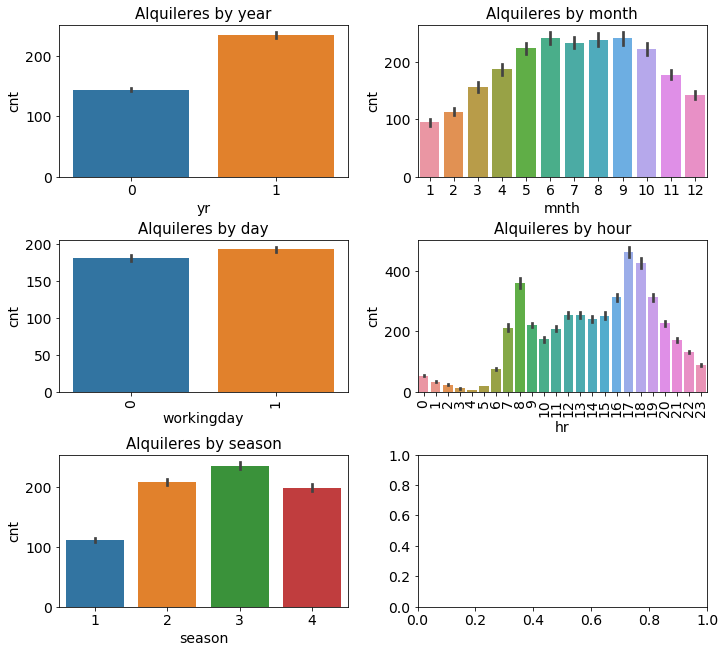

In [15]:
# Preparamos una figura de m x n
mpl.rc('font', size=14)
mpl.rc('axes', titlesize=15)
figure, axes = plt.subplots(nrows=3, ncols=2) # M 3rows 2columns
plt.tight_layout(0.1) # Espacio entre cada subgráfico
figure.set_size_inches(10, 9) # Tamaño total de la figura

# Distribución de alquileres según las features: season, month, day, hour, workingday

sns.barplot(x='yr', y='cnt', data=hourData, ax=axes[0, 0])
sns.barplot(x='mnth', y='cnt', data=hourData, ax=axes[0, 1])
sns.barplot(x='workingday', y='cnt', data=hourData, ax=axes[1, 0])
sns.barplot(x='hr', y='cnt', data=hourData, ax=axes[1, 1])
sns.barplot(x='season', y='cnt', data=hourData, ax=axes[2,0])

# Titulos
axes[0, 0].set(title='Alquileres by year')
axes[0, 1].set(title='Alquileres by month')
axes[1, 0].set(title='Alquileres by day')
axes[1, 1].set(title='Alquileres by hour')
axes[2, 0].set(title='Alquileres by season')
# axes[2, 1].set(title='Alquileres by second')

# Rotamos 90 grados las etiquetas del eje x de la fila 1
axes[1, 0].tick_params(axis='x', labelrotation=90)
axes[1, 1].tick_params(axis='x', labelrotation=90)

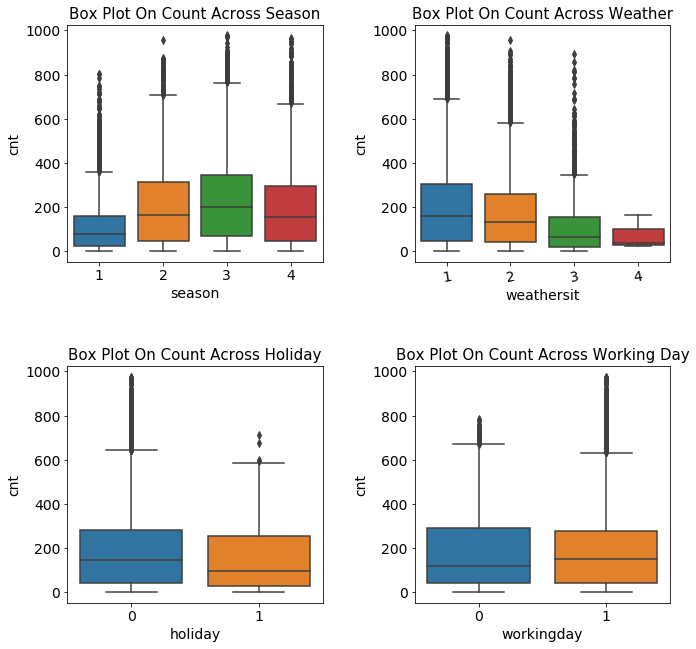

In [16]:
# Creamos una figura de 2x2
figure, axes = plt.subplots(nrows=2, ncols=2) # 2rows 2columns
plt.tight_layout()
figure.set_size_inches(10, 10)

# Step 2 : Creamos los subgráficos
# Gráfico de bigotes de los alquileres por season, weather, holiday, and workingday
sns.boxplot(x='season', y='cnt', data=hourData, ax=axes[0, 0])
sns.boxplot(x='weathersit', y='cnt', data=hourData, ax=axes[0, 1])
sns.boxplot(x='holiday', y='cnt', data=hourData, ax=axes[1, 0])
sns.boxplot(x='workingday', y='cnt', data=hourData, ax=axes[1, 1])

# Step 3: Configuración de los subgráficos
# titulo
axes[0, 0].set(title='Box Plot On Count Across Season')
axes[0, 1].set(title='Box Plot On Count Across Weather')
axes[1, 0].set(title='Box Plot On Count Across Holiday')
axes[1, 1].set(title='Box Plot On Count Across Working Day')

# 3.2 eliminar que se sobrepongan los titulos
axes[0, 1].tick_params('x', labelrotation=10) # rotate 10 degrees

In [18]:
# Análisis exploratorio de los datos (EDA)

# ¿podemos reducir la dimensionalidad de nuestros datos?
# En este ejemplo podemos eliminar instant y dteday
hourData = hourData.drop(columns=['instant', 'dteday', 'casual', 'registered'])


[Text(0.5, 0, 'season'),
 Text(1.5, 0, 'yr'),
 Text(2.5, 0, 'mnth'),
 Text(3.5, 0, 'hr'),
 Text(4.5, 0, 'holiday'),
 Text(5.5, 0, 'weekday'),
 Text(6.5, 0, 'workingday'),
 Text(7.5, 0, 'weathersit'),
 Text(8.5, 0, 'temp'),
 Text(9.5, 0, 'atemp'),
 Text(10.5, 0, 'hum'),
 Text(11.5, 0, 'windspeed'),
 Text(12.5, 0, 'cnt')]

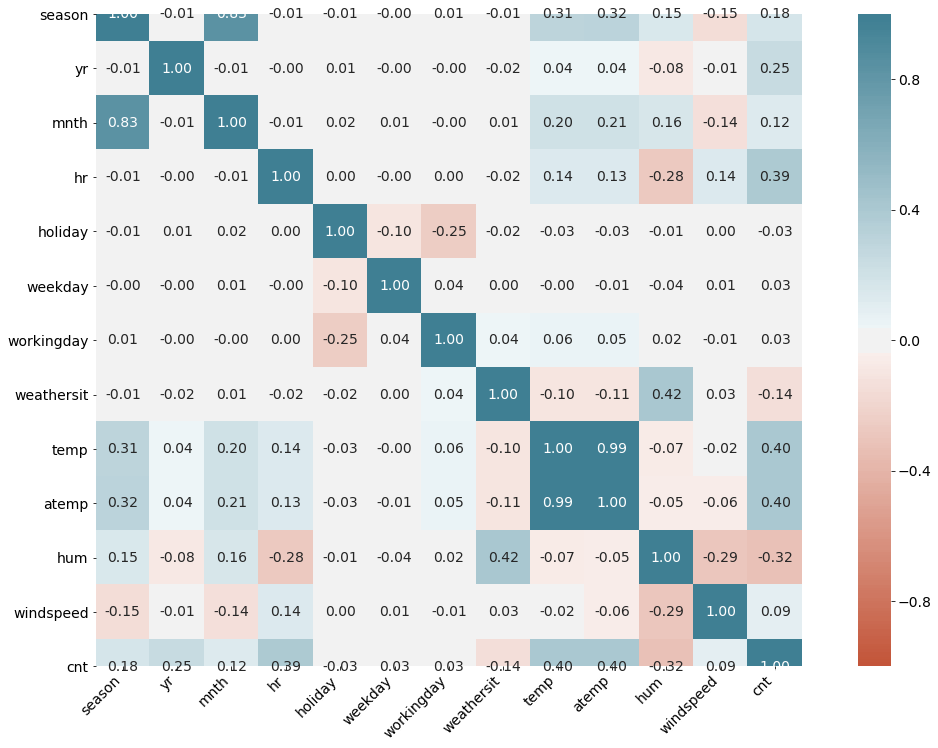

In [19]:
# Vamos a estudiar las correlaciones para entender las variables
# Calcula coeficiente de correlación de Pearson
corr = hourData.corr(method ='pearson') #por defecto Pearson ¿existe relación lineal entre variables?

# HeatMap con tamaño ampliado, cuadrado, divergencia con colores y con anotaciones de 2 decimales
plt.figure(figsize=(20,12))
ax = sns.heatmap(
 corr,
 vmin=-1, vmax=1, center=0,
 cmap=sns.diverging_palette(20, 220, n=200),
 square=True, annot=True, fmt=".2f"
)
# Rota las etiquetas del eje horizontal
ax.set_xticklabels(
 ax.get_xticklabels(),
 rotation=45,
 horizontalalignment='right'
)


In [20]:
# Árboles de decisión
# Separamos el conjunto de test y train
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(hourData,hourData.cnt,test_size = 0.30 ,random_state = 2)

from sklearn.tree import DecisionTreeRegressor

# Finding best parameters for decision tree
dt = DecisionTreeRegressor(random_state=0)
dt_params = {'max_depth':np.arange(1,50,2),'min_samples_leaf':np.arange(2,15)}

from sklearn.model_selection import GridSearchCV
gs_dt = GridSearchCV(dt,dt_params,cv=3)
gs_dt.fit(x_train,y_train)
a = gs_dt.best_params_

In [ ]:
gs_dt

In [21]:
a

{'max_depth': 9, 'min_samples_leaf': 2}

In [27]:
# Entrenamos con los parámetros
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=10,min_samples_leaf=3)
model = dtr.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [23]:
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error, mean_squared_error

msle=mean_squared_log_error(y_pred,y_test)
rmsle=np.sqrt(msle)
print('RMLSE for the data:',rmsle) # For decision tree

print('MAE:',mean_absolute_error(y_pred,y_test))
print('MSE:',mean_squared_error(y_pred,y_test))

RMLSE for the data: 0.0012497181238357784
MAE: 0.21185175010481275
MSE: 0.3117691844781699


In [24]:
from sklearn import tree
r_texto = tree.export_text(dtr)

In [25]:
print(r_texto)

|--- feature_12 <= 265.50
|   |--- feature_12 <= 109.50
|   |   |--- feature_12 <= 47.50
|   |   |   |--- feature_12 <= 20.50
|   |   |   |   |--- feature_12 <= 9.50
|   |   |   |   |   |--- feature_12 <= 4.50
|   |   |   |   |   |   |--- feature_12 <= 2.50
|   |   |   |   |   |   |   |--- feature_12 <= 1.50
|   |   |   |   |   |   |   |   |--- value: [1.00]
|   |   |   |   |   |   |   |--- feature_12 >  1.50
|   |   |   |   |   |   |   |   |--- value: [2.00]
|   |   |   |   |   |   |--- feature_12 >  2.50
|   |   |   |   |   |   |   |--- feature_12 <= 3.50
|   |   |   |   |   |   |   |   |--- value: [3.00]
|   |   |   |   |   |   |   |--- feature_12 >  3.50
|   |   |   |   |   |   |   |   |--- value: [4.00]
|   |   |   |   |   |--- feature_12 >  4.50
|   |   |   |   |   |   |--- feature_12 <= 6.50
|   |   |   |   |   |   |   |--- feature_12 <= 5.50
|   |   |   |   |   |   |   |   |--- value: [5.00]
|   |   |   |   |   |   |   |--- feature_12 >  5.50
|   |   |   |   |   |   |   |   |--